In [1]:
import numpy as np #To handle multi dimensional or two dimensionals array.
import pandas as pd #Quite useful for handling data.
import matplotlib.pyplot as plt #Used to make plots.
from sklearn.linear_model import LinearRegression #scikitlearn - contain machine learning related models.
from sklearn.metrics import mean_squared_error
import math

In [2]:
#reading .csv into a dataframe.
house_data = pd.read_csv(r"F:\UDEMY\DEEP LEARNING AND ML\Datasets\Datasets\house_prices.csv")
house_df = house_data.copy()
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# SIMPLE LINEAR REGRESSION

In [3]:
#Checking the number of rows and columns in Pandas DataFrame: house_df
house_df.shape

(21613, 21)

In [4]:
#Checking the row index labels of Pandas DataFrame: house_df
house_df.index

RangeIndex(start=0, stop=21613, step=1)

In [5]:
#Checking the column labels of Pandas DataFrame: house_df
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Getting the concise summary of the dataframe.
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Getting the statistical summary of numerical columns of dataframe
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Finding the missing values
house_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
#storing the columns in variables
size = house_df['sqft_living']
price = house_df['price']

In [10]:
#Transforming this dataset into arrays with the help of numpy because machine learning handle arrays not DataFrames.
x = np.array(size).reshape(-1,1)
y = np.array(price).reshape(-1,1)

In [11]:
print(x) #it doesn't contain the indices anymore. it is going to store a single value in the form of arrays.

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [12]:
#using LinearRegression and fit() to train the model.
model = LinearRegression() #trying to define the linear relationship between the size and the prices.
model.fit(x,y) #Optimization #training the model with the help of .fit() function.

LinearRegression()

In [13]:
#We are able to evaluate the model based on the  MSE and R value.
regression_model_mse = mean_squared_error(x,y)
print("MSE ", math.sqrt(regression_model_mse))
print("R Squared Value", model.score(x,y))

MSE  650965.7788663033
R Squared Value 0.4928532179037931


In [14]:
#We can get the b values after the model.fit()

print(model.coef_[0]) #this is the b1 - b1 parameter is the slope of that given linear regression line.
print(model.intercept_[0]) #this is the b0 - INTERCEPT between the linear regression model line and prices axis(y) is concerned.

[280.6235679]
-43580.743094473844


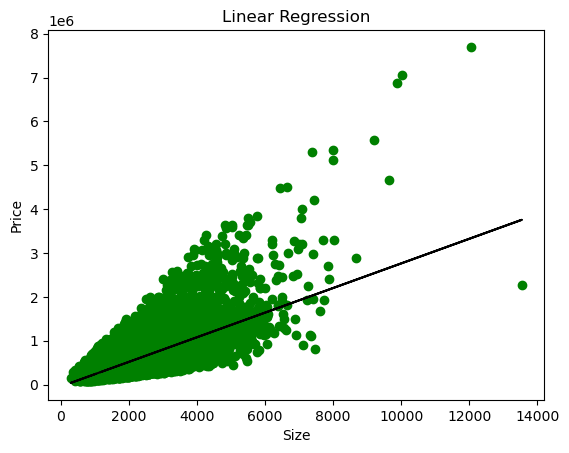

In [15]:
#Visualizing the dataset with the fitted model
plt.scatter(x, y, color='green')
plt.plot(x, model.predict(x), color='black') #model predicted with x values.
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [16]:
#NOW WE CAN MAKE THE PREDICTIONS FROM THE MODEL ie. predicting the prices
print("Prediction of the Model: ", model.predict([[2000]])) #predicting the values based on the new data points.

Prediction of the Model:  [[517666.39270042]]


## HOW TO ANALYZE THE RESULTS?

With R Squared value .49 it means that there is almost no relationship between these two features wich are prices and size.
If the R Squared value for example is around 0.8 or 0.9 then we could have said that there is a strong linear relationship between the features.